# Sandbox

This is a sandbox for initial testing of the functionality of `feems`. I am using the running the algorithm on a default rectangular (8x12) simulated grid with a symmetric corridor in between of low migration. 

In [1]:
# base
import numpy as np
import networkx as nx
from pandas_plink import read_plink
from sklearn.impute import SimpleImputer
import pkg_resources

# viz
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# feems
from feems.utils import prepare_graph_inputs
from feems import SpatialGraph, Viz
from feems.sim import setup_graph, simulate_genotypes

In [33]:
# simulate data for testing -- simple graph + genotypes from stepping stone model
graph, coord, grid, edge = setup_graph(barrier_prob=0.8)

gen_test = simulate_genotypes(graph)

Simulating ~SNP 0
Simulating ~SNP 50
Simulating ~SNP 100
Simulating ~SNP 150
Simulating ~SNP 200
Simulating ~SNP 250
Simulating ~SNP 300
Simulating ~SNP 350
Simulating ~SNP 400
Simulating ~SNP 450
Simulating ~SNP 500
Simulating ~SNP 550
Simulating ~SNP 600
Simulating ~SNP 650
Simulating ~SNP 700
Simulating ~SNP 750
Simulating ~SNP 800
Simulating ~SNP 850
Simulating ~SNP 900
Simulating ~SNP 950


In [34]:
# constructing the graph object
sp_Graph = SpatialGraph(gen_test, coord, grid, edge)

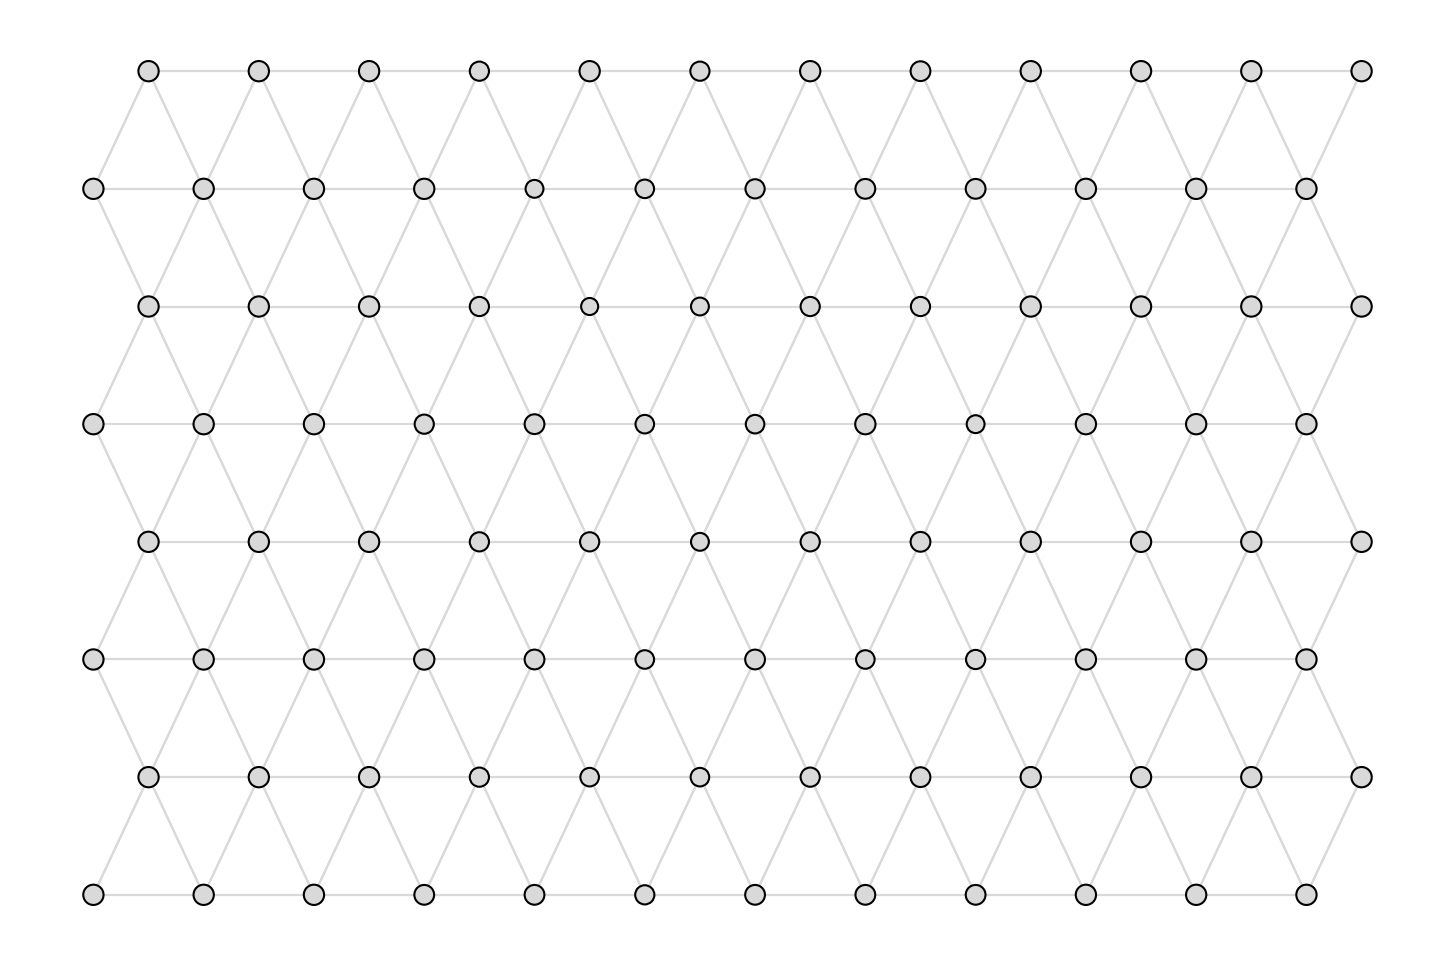

In [35]:
proj_test = ccrs.EquidistantConic(central_longitude=5.5, central_latitude=3.0)
# drawing the simulated graph 
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1)  
v = Viz(ax, sp_Graph, edge_width=.5, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=10, 
        obs_node_size=7.5, sample_pt_color="black", 
        cbar_font_size=10)
v.draw_samples()
v.draw_edges(use_weights=False)
v.draw_obs_nodes(use_ids=False)

In [36]:
%%time
#sp_Graph.fit_null_model()
sp_Graph.fit(lamb = 0.1)

constant-w/variance fit, converged in 133 iterations, train_loss=76426.9628096
lambda=0.1000000, alpha=1.5012442, converged in 28 iterations, train_loss=67886.8190423
CPU times: user 1.74 s, sys: 59.6 ms, total: 1.8 s
Wall time: 564 ms


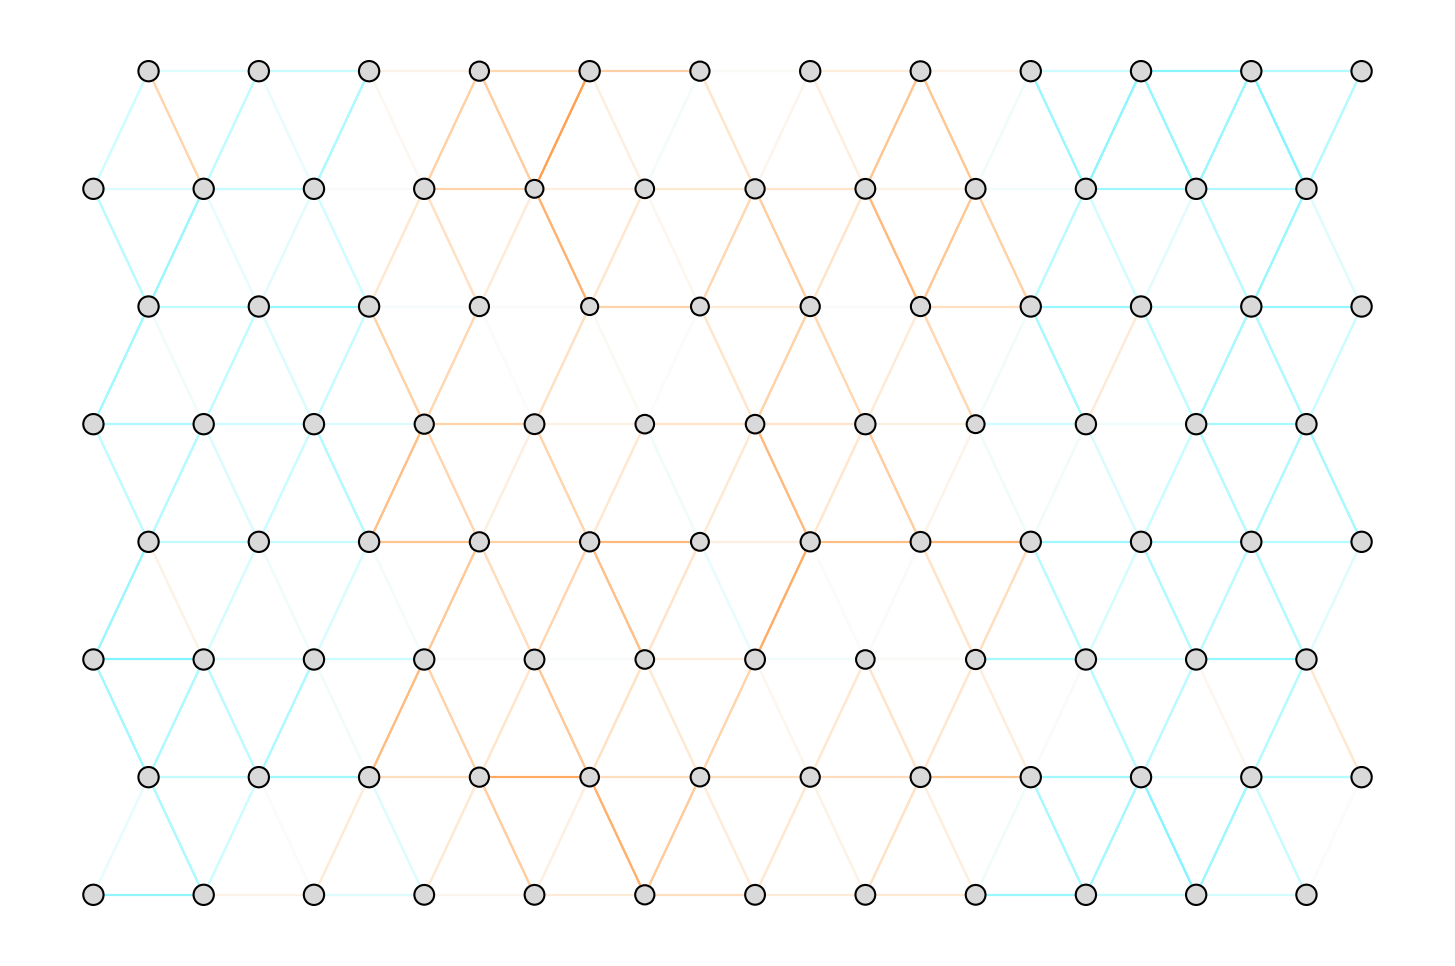

In [37]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1)  
v = Viz(ax, sp_Graph, edge_width=.5, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=20, 
        obs_node_size=7.5, sample_pt_color="black", 
        cbar_font_size=10)
v.draw_edges(use_weights=True)
v.draw_obs_nodes(use_ids=False) 